In [58]:
import random
import time
from uxsim import *
from IPython.display import display, Image

In [59]:
# Initialize simulation world
W = World(
    name="ddos_demo",  # Scenario name
    deltan=5,  # Simulation aggregation unit
    tmax=1200,  # Total simulation time
    print_mode=1,  # Print simulation progress
    save_mode=1,  # Save results
    show_mode=1,  # Show visualization
    random_seed=0  # Set random seed for repeatability
)


In [60]:
# Create nodes
W.addNode("orig1", 0, 0)
W.addNode("orig2", 0, 2)
node_signal = W.addNode("merge", 1, 1, signal=[30, 60])  # Add signal phases
W.addNode("dest", 2, 1)

# Add links and assign signal groups for dynamic traffic light
W.addLink("link1", "orig1", "merge", length=1000, free_flow_speed=20,
          number_of_lanes=1, merge_priority=0.5, signal_group=0)
W.addLink("link2", "orig2", "merge", length=1000, free_flow_speed=20,
          number_of_lanes=1, merge_priority=2, signal_group=1)
W.addLink("link3", "merge", "dest", length=1000, free_flow_speed=20,
          number_of_lanes=1)

# Define demand
W.adddemand("orig1", "dest", 0, 1000, 1)
W.adddemand("orig2", "dest", 500, 1000, 2)

In [61]:
# DDoS Red Agent Simulation: Flooding with irrelevant requests
def red_agent_ddos():
    """Simulate a DDoS attack by flooding the system with fake requests."""
    if int(W.TIME) % 50 == 0:  # Every 50 seconds simulate a DDoS attack
        num_requests = random.randint(10, 100)  # Simulate a random number of fake requests
        for _ in range(num_requests):
            random_link = random.choice(list(W.LINKS))  # Correctly pick a random link from LINK values
            random_phase = random.choice([0, 1])  # Randomly pick a signal phase (0 or 1)

            # Simulating DDoS: Randomly assign the signal group phase to disrupt normal flow
            if hasattr(random_link, 'signal_group'):
                random_link.signal_group = random_phase  # Alter signal group phase

            print(
                f"Red agent DDoS at t = {W.TIME}: Attacking signal phase on {random_link.name}, new phase = {random_phase}")

In [62]:
# signal_group correction
for link in W.LINKS:
    if hasattr(link, 'signal_group') and isinstance(link.signal_group, int):
        link.signal_group = [link.signal_group]

# Simulation
while W.check_simulation_ongoing():
    W.exec_simulation(duration_t2=10.0)
    red_agent_ddos()
    if int(W.TIME) % 100 == 0:
        print(f"t = {W.TIME} s; Signal phase = {node_signal.signal_phase}")


simulation setting:
 scenario name: ddos_demo
 simulation duration:	 1200 s
 number of vehicles:	 2000 veh
 total road length:	 3000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 240
 number of platoons:	 400
 number of links:	 3
 number of nodes:	 4
 setup time:		 0.33 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
Red agent DDoS at t = 50: Attacking signal phase on link3, new phase = 1
Red agent DDoS at t = 50: Attacking signal phase on link2, new phase = 1
Red agent DDoS at t = 50: Attacking signal phase on link3, new phase = 0
Red agent DDoS at t = 50: Attacking signal phase on link2, new phase = 0
Red agent DDoS at t = 50: Attacking signal phase on link3, new phase = 0
Red agent DDoS at t = 50: Attacking signal phase on link1, new phase = 0
Red agent DDoS at t = 50: Attacking signal phase on link1, new phase = 1
Red agent DDoS at t = 50: Attacking signal phase on link2, new phase 

TypeError: argument of type 'int' is not iterable

 generating animation...


  0%|          | 0/120 [00:00<?, ?it/s]

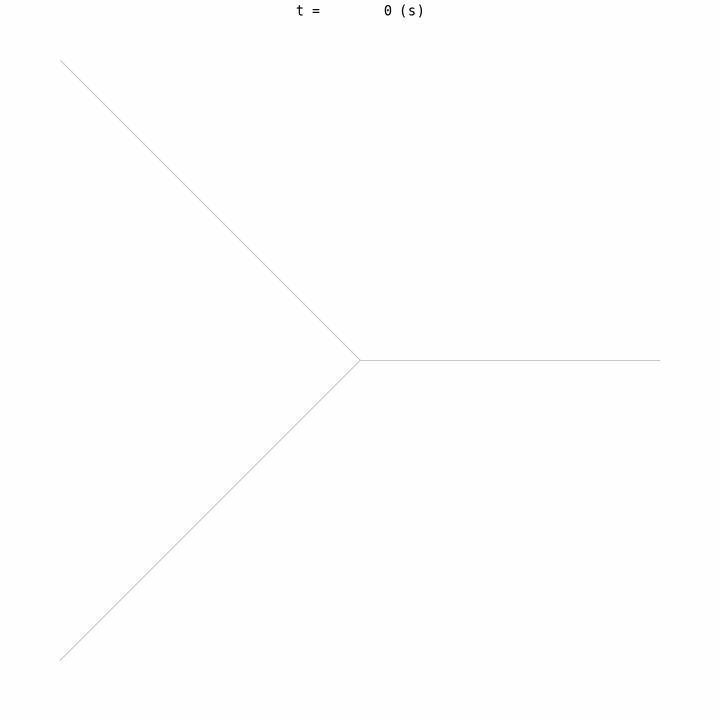

In [49]:
# Execute simulation in steps for dynamic signal logic
while W.check_simulation_ongoing():
    W.exec_simulation(duration_t2=float(10))  # Advance simulation by 10s

    # DDoS attack initiated by the red agent
    red_agent_ddos()

    # Display simulation status every 100 seconds
    if int(W.TIME) % 100 == 0:
        print(f"t = {W.TIME} s; Signal phase = {node_signal.signal_phase}")

# Visualization
W.analyzer.network_fancy(animation_speed_inverse=15, sample_ratio=0.3,
                         interval=3, trace_length=3, network_font_size=0)

with open("outddos_demo/anim_network_fancy.gif", "rb") as f:
    display(Image(data=f.read(), format='png'))

In [50]:
# Export analysis data
display(W.analyzer.basic_to_pandas())
display(W.analyzer.od_to_pandas())
display(W.analyzer.mfd_to_pandas())
display(W.analyzer.link_to_pandas())
display(W.analyzer.link_traffic_state_to_pandas())
display(W.analyzer.vehicles_to_pandas())

W.analyzer.output_data()


,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,635,196600.0,309.606299,133100.0,209.606299


,orig,dest,total_trips,completed_trips,free_travel_time,average_travel_time,stddiv_travel_time,shortest_distance,average_distance_traveled_per_veh,stddiv_distance_traveled_per_veh
0,orig1,dest,1000,350,100.0,297.642857,185.898823,2000.0,991.875,962.86661
1,orig2,dest,1000,285,100.0,324.298246,132.089943,2000.0,784.875,941.40154


,t,network_k,network_q
0,0,0.01526,0.277778


,link,start_node,end_node,traffic_volume,vehicles_remain,free_travel_time,average_travel_time,stddiv_travel_time,length
0,link1,orig1,merge,375,155,50.0,439.875000,230.691860,1000
1,link2,orig2,merge,295,125,50.0,139.062500,89.105837,1000
2,link3,merge,dest,635,35,50.0,51.520833,2.753706,1000


,link,t,x,delta_t,delta_x,q,k,v
0,link1,0,0.0,120,100.0,0.770833,0.052604,14.653465
1,link1,0,100.0,120,100.0,0.739583,0.036979,20.000000
2,link1,0,200.0,120,100.0,0.708333,0.035417,20.000000
3,link1,0,300.0,120,100.0,0.666667,0.033333,20.000000
4,link1,0,400.0,120,100.0,0.635417,0.031771,20.000000
...,...,...,...,...,...,...,...,...
295,link3,1080,500.0,120,100.0,0.593750,0.029687,20.000000
296,link3,1080,600.0,120,100.0,0.604167,0.030208,20.000000
297,link3,1080,700.0,120,100.0,0.604167,0.030208,20.000000
298,link3,1080,800.0,120,100.0,0.604167,0.030208,20.000000


,name,dn,orig,dest,t,link,x,s,v
0,0,5,orig1,dest,5,link1,0.0,-1.0,20.0
1,0,5,orig1,dest,10,link1,100.0,-1.0,20.0
2,0,5,orig1,dest,15,link1,200.0,-1.0,20.0
3,0,5,orig1,dest,20,link1,300.0,-1.0,20.0
4,0,5,orig1,dest,25,link1,400.0,-1.0,20.0
...,...,...,...,...,...,...,...,...,...
32332,399,5,orig2,dest,1175,waiting_at_origin_node,-1.0,-1.0,-1.0
32333,399,5,orig2,dest,1180,waiting_at_origin_node,-1.0,-1.0,-1.0
32334,399,5,orig2,dest,1185,waiting_at_origin_node,-1.0,-1.0,-1.0
32335,399,5,orig2,dest,1190,waiting_at_origin_node,-1.0,-1.0,-1.0
